In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('food-allergy-analysis.csv')
df.head()

,SUBJECT_ID,BIRTH_YEAR,GENDER_FACTOR,RACE_FACTOR,ETHNICITY_FACTOR,PAYER_FACTOR,ATOPIC_MARCH_COHORT,AGE_START_YEARS,AGE_END_YEARS,SHELLFISH_ALG_START,...,CASHEW_ALG_END,ATOPIC_DERM_START,ATOPIC_DERM_END,ALLERGIC_RHINITIS_START,ALLERGIC_RHINITIS_END,ASTHMA_START,ASTHMA_END,FIRST_ASTHMARX,LAST_ASTHMARX,NUM_ASTHMARX
0,1,2006,S1 - Female,R1 - Black,E0 - Non-Hispanic,P1 - Medicaid,False,0.093087,3.164956,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1994,S1 - Female,R0 - White,E0 - Non-Hispanic,P0 - Non-Medicaid,False,12.232717,18.880219,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.262834,18.880219,2.0
2,3,2006,S0 - Male,R0 - White,E1 - Hispanic,P0 - Non-Medicaid,True,0.010951,6.726899,NaN,...,NaN,4.884326,NaN,3.917864,6.157426,5.127995,NaN,1.404517,6.157426,4.0
3,4,2004,S0 - Male,R4 - Unknown,E1 - Hispanic,P0 - Non-Medicaid,False,2.398357,9.111567,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2006,S1 - Female,R1 - Black,E0 - Non-Hispanic,P0 - Non-Medicaid,False,0.013689,6.193018,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


So first in my analysis I'm going to start out by trying to find any general patterns in people who have allergies and those who don't

In [3]:
df = df.drop(['SUBJECT_ID', 'ATOPIC_MARCH_COHORT'], axis = 1)
df = df[df['AGE_START_YEARS'] >= 0]
df = df[df['AGE_END_YEARS'] > df['AGE_START_YEARS']]

In [4]:
import math
def allergys(*allergy):
    #print(allergy)
    if False in np.isnan(allergy):
        return 'Yes'
    return 'No'

df['Has_Allergies?'] = df[df.columns[7:-5:2]].apply(allergys, 1) # Not including asthma since asthma is not an allergy

In [5]:
df.head()

,BIRTH_YEAR,GENDER_FACTOR,RACE_FACTOR,ETHNICITY_FACTOR,PAYER_FACTOR,AGE_START_YEARS,AGE_END_YEARS,SHELLFISH_ALG_START,SHELLFISH_ALG_END,FISH_ALG_START,...,ATOPIC_DERM_START,ATOPIC_DERM_END,ALLERGIC_RHINITIS_START,ALLERGIC_RHINITIS_END,ASTHMA_START,ASTHMA_END,FIRST_ASTHMARX,LAST_ASTHMARX,NUM_ASTHMARX,Has_Allergies?
0,2006,S1 - Female,R1 - Black,E0 - Non-Hispanic,P1 - Medicaid,0.093087,3.164956,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
1,1994,S1 - Female,R0 - White,E0 - Non-Hispanic,P0 - Non-Medicaid,12.232717,18.880219,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.262834,18.880219,2.0,No
2,2006,S0 - Male,R0 - White,E1 - Hispanic,P0 - Non-Medicaid,0.010951,6.726899,NaN,NaN,NaN,...,4.884326,NaN,3.917864,6.157426,5.127995,NaN,1.404517,6.157426,4.0,Yes
3,2004,S0 - Male,R4 - Unknown,E1 - Hispanic,P0 - Non-Medicaid,2.398357,9.111567,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
4,2006,S1 - Female,R1 - Black,E0 - Non-Hispanic,P0 - Non-Medicaid,0.013689,6.193018,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No


In [6]:
df['Has_Allergies?'].value_counts()

No     231370
Yes    101805
Name: Has_Allergies?, dtype: int64

Let's take a look at the gender, race, ethnicity, and age to see if we can find any trends in people who have allergies vs those who don't

<AxesSubplot:xlabel='ETHNICITY_FACTOR', ylabel='count'>

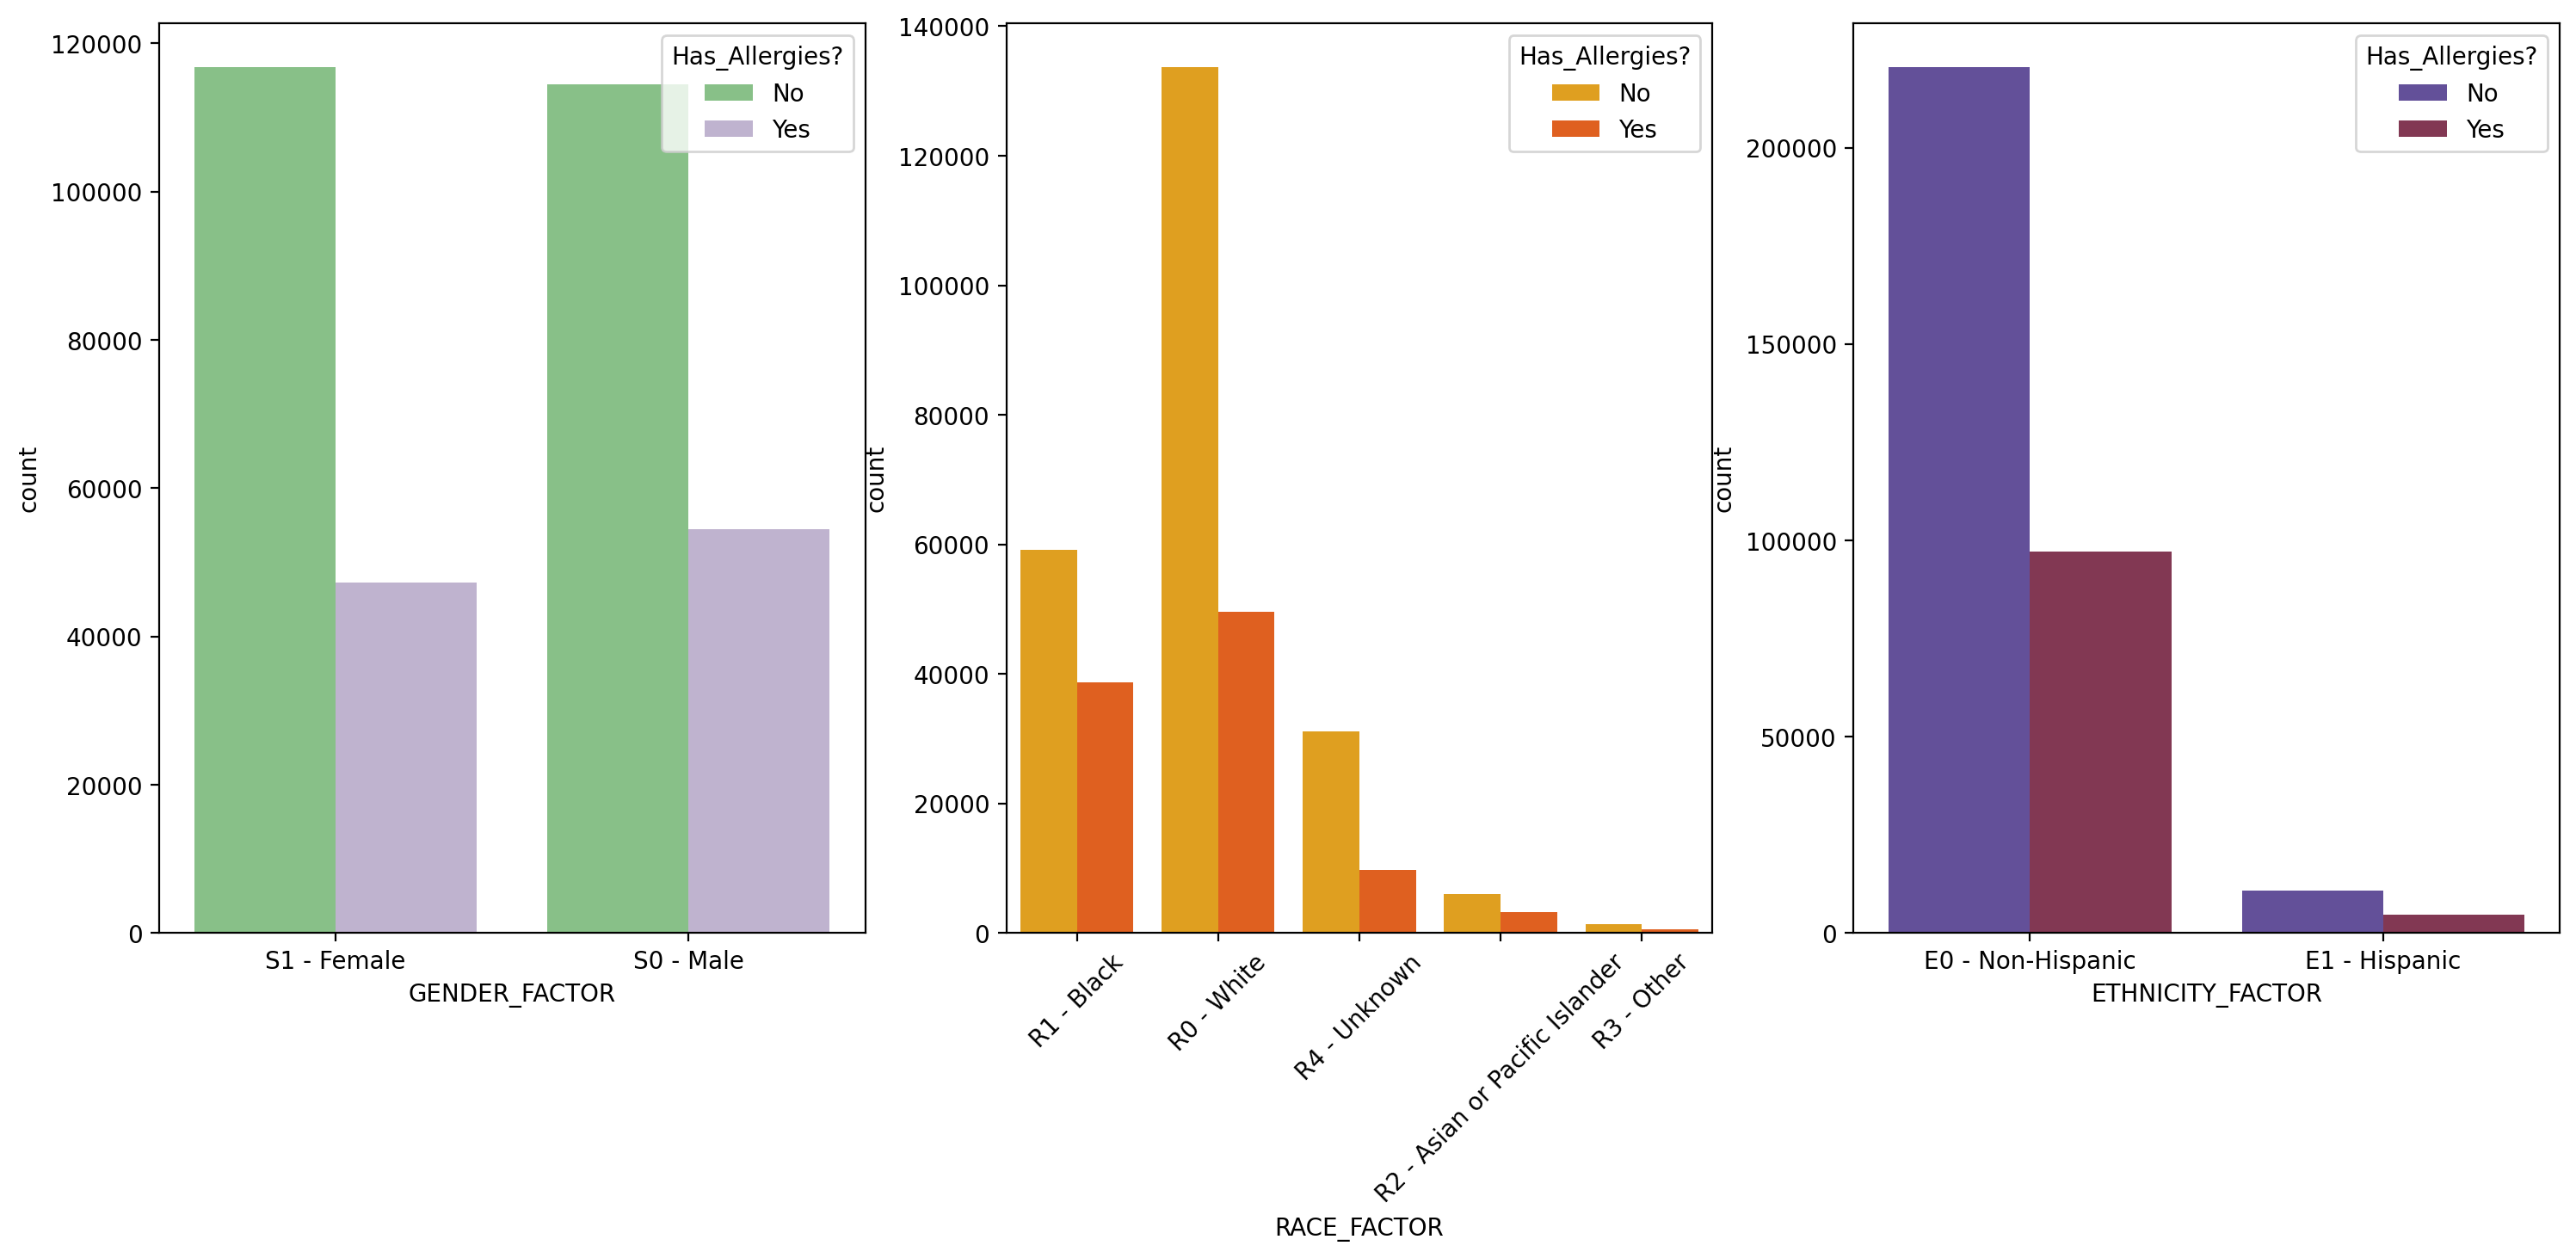

In [7]:
fig, axes = plt.subplots(1, 3, figsize = (18, 7), dpi = 200);
sns.countplot(data = df, x = 'GENDER_FACTOR', hue = 'Has_Allergies?' ,ax = axes[0], palette='Accent')
sns.countplot(data = df, x = 'RACE_FACTOR', hue = 'Has_Allergies?' ,ax = axes[1], palette='autumn_r')
axes[1].tick_params('x', labelrotation = 45);
sns.countplot(data = df, x = 'ETHNICITY_FACTOR', hue = 'Has_Allergies?' ,ax = axes[2], palette = 'twilight')

As expected there is no real big difference between people who have allergies and those who don't based on factors like gender, race, and ethnicity. However there are still some things we can notice from this, like how a higher population of males have allergies compared to females and in fact more of the males have allergies compared to males who don't which is the opposite of females. This also applies to black people who have a higher population of people that do have allergies compared to white people which have a lower population of people who have allergies.

According to google, men are susceptible to more allergies when they're younger while women are more susceptible entering young adulthood. Black people are more likely to be susceptible to wheat, soy, and seafood allergies.

Now let's try something new. According to research, allergies and asthma tend to happen together but are not causes of each others. Do people with asthma tend to have more allergies compared to people who don't?

Let's do an A\B Test (https://inferentialthinking.com/chapters/12/1/AB_Testing.html) and start with our hypothesis: 

Null Hypothesis: Having asthma vs not has nothing to do with having allergies. Any correlation is due to chance.

Alternative Hypothesis: People with asthma tend to have allergies more often than people without asthma.

Test Statistic: Mean of Allergies in people who have Asthma

In [8]:
pd.options.mode.chained_assignment = None

In [9]:
ast = df[['ASTHMA_START', 'Has_Allergies?']]
ast['ASTHMA_START'] = ast['ASTHMA_START'].apply(lambda x: 'No Asthma' if np.isnan(x) else 'Has Asthma')
ast['Has_Allergies?'] = ast['Has_Allergies?'].map({'No': 0, 'Yes':1})
ast.head()


,ASTHMA_START,Has_Allergies?
0,No Asthma,0
1,No Asthma,0
2,Has Asthma,1
3,No Asthma,0
4,No Asthma,0


0 means they don't have allergies and 1 means that they do.

In [10]:
alpha = 0.01
arr = []
for i in range(3000):
    shuffler = ast['ASTHMA_START'].sample(frac = 1).values
    comb = pd.concat([pd.DataFrame(shuffler, columns=['ASTHMA_START']), ast['Has_Allergies?']], axis = 1)
    comb = comb.groupby('ASTHMA_START').mean()
    arr.append(float(comb.values[0] - comb.values[1]))
arr = np.round(arr, 2)


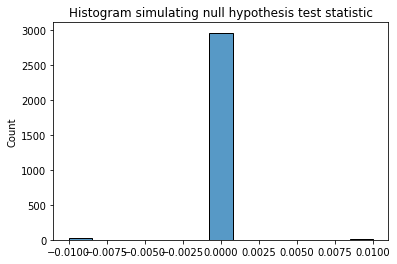

In [11]:
sns.histplot(arr)
plt.title('Histogram simulating null hypothesis test statistic');

This is our sample distribution of allergy means for people who do have asthma. It is randomized so we can simulate under the null hypothesis which says that there shouldn't be any difference in the mean allergy amount for people with asthma and those without.

Now let's look at our test statistic and compare it

Text(0.5, 1.0, 'Test Statistics simulated under null distribution')

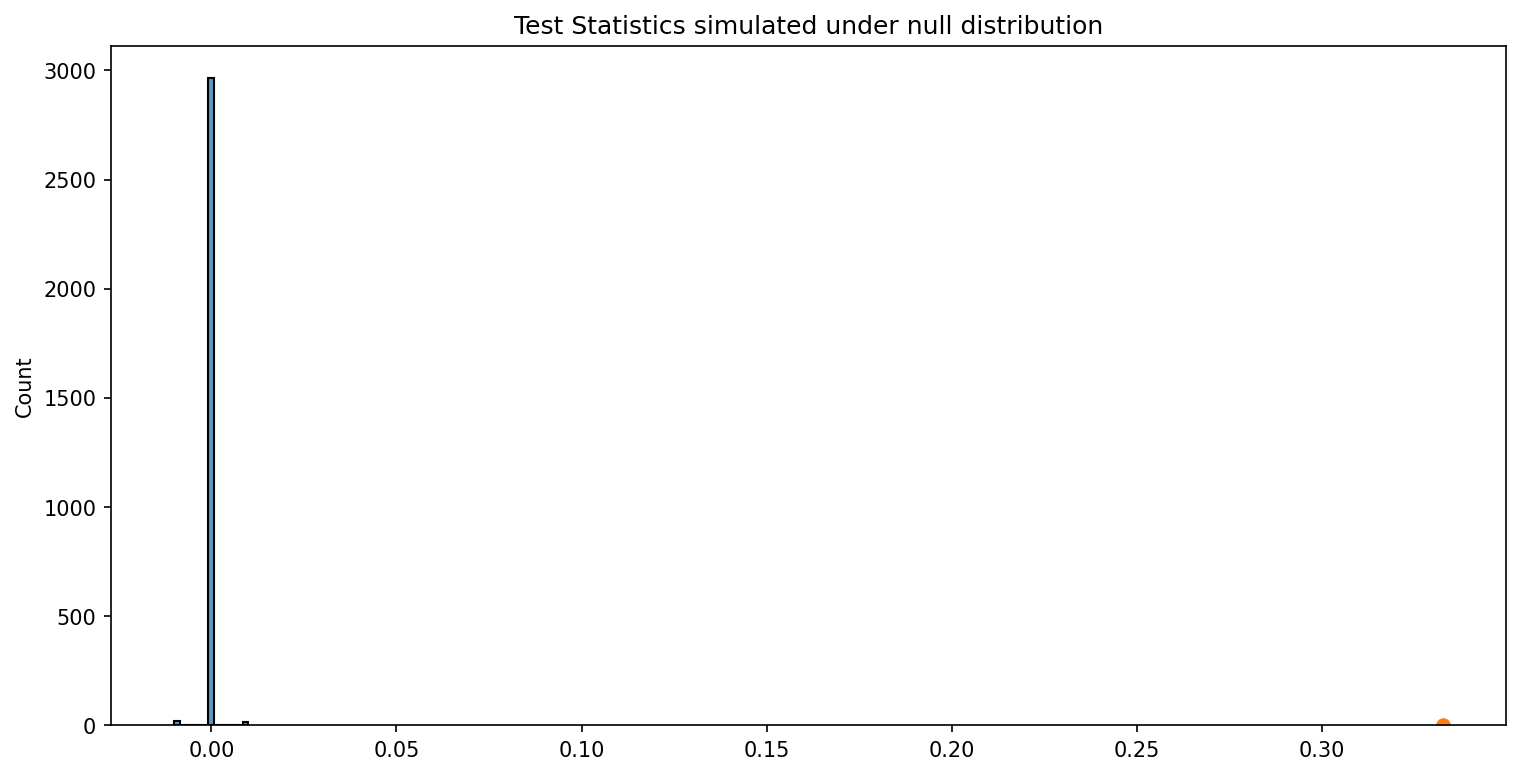

In [12]:
plt.figure(figsize= (12, 6), dpi = 150);
means = ast.groupby('ASTHMA_START').mean()
observed = means.values[0] - means.values[1]
sns.histplot(arr)
plt.scatter(x = observed, y = 0)
plt.title('Test Statistics simulated under null distribution')

Well that's a clear difference lol. With this we can clearly reject our null hypothesis that there is no correlation between the allergies of those who have asthma and those who don't because it's obvious that people who have asthma are more likely to have an allergy (not causation however).

So then is there any specific allergy that's present among those who have asthma more often or is it just any allergy cna be more present?

In [13]:
all_asthma = pd.concat([df[df.columns[7:-6:2]], ast['ASTHMA_START']], axis = 1)
all_asthma.head()

,SHELLFISH_ALG_START,FISH_ALG_START,MILK_ALG_START,SOY_ALG_START,EGG_ALG_START,WHEAT_ALG_START,PEANUT_ALG_START,SESAME_ALG_START,TREENUT_ALG_START,WALNUT_ALG_START,PECAN_ALG_START,PISTACH_ALG_START,ALMOND_ALG_START,BRAZIL_ALG_START,HAZELNUT_ALG_START,CASHEW_ALG_START,ATOPIC_DERM_START,ALLERGIC_RHINITIS_START,ASTHMA_START
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Asthma
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Asthma
2,NaN,NaN,1.002053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.884326,3.917864,Has Asthma
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Asthma
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Asthma


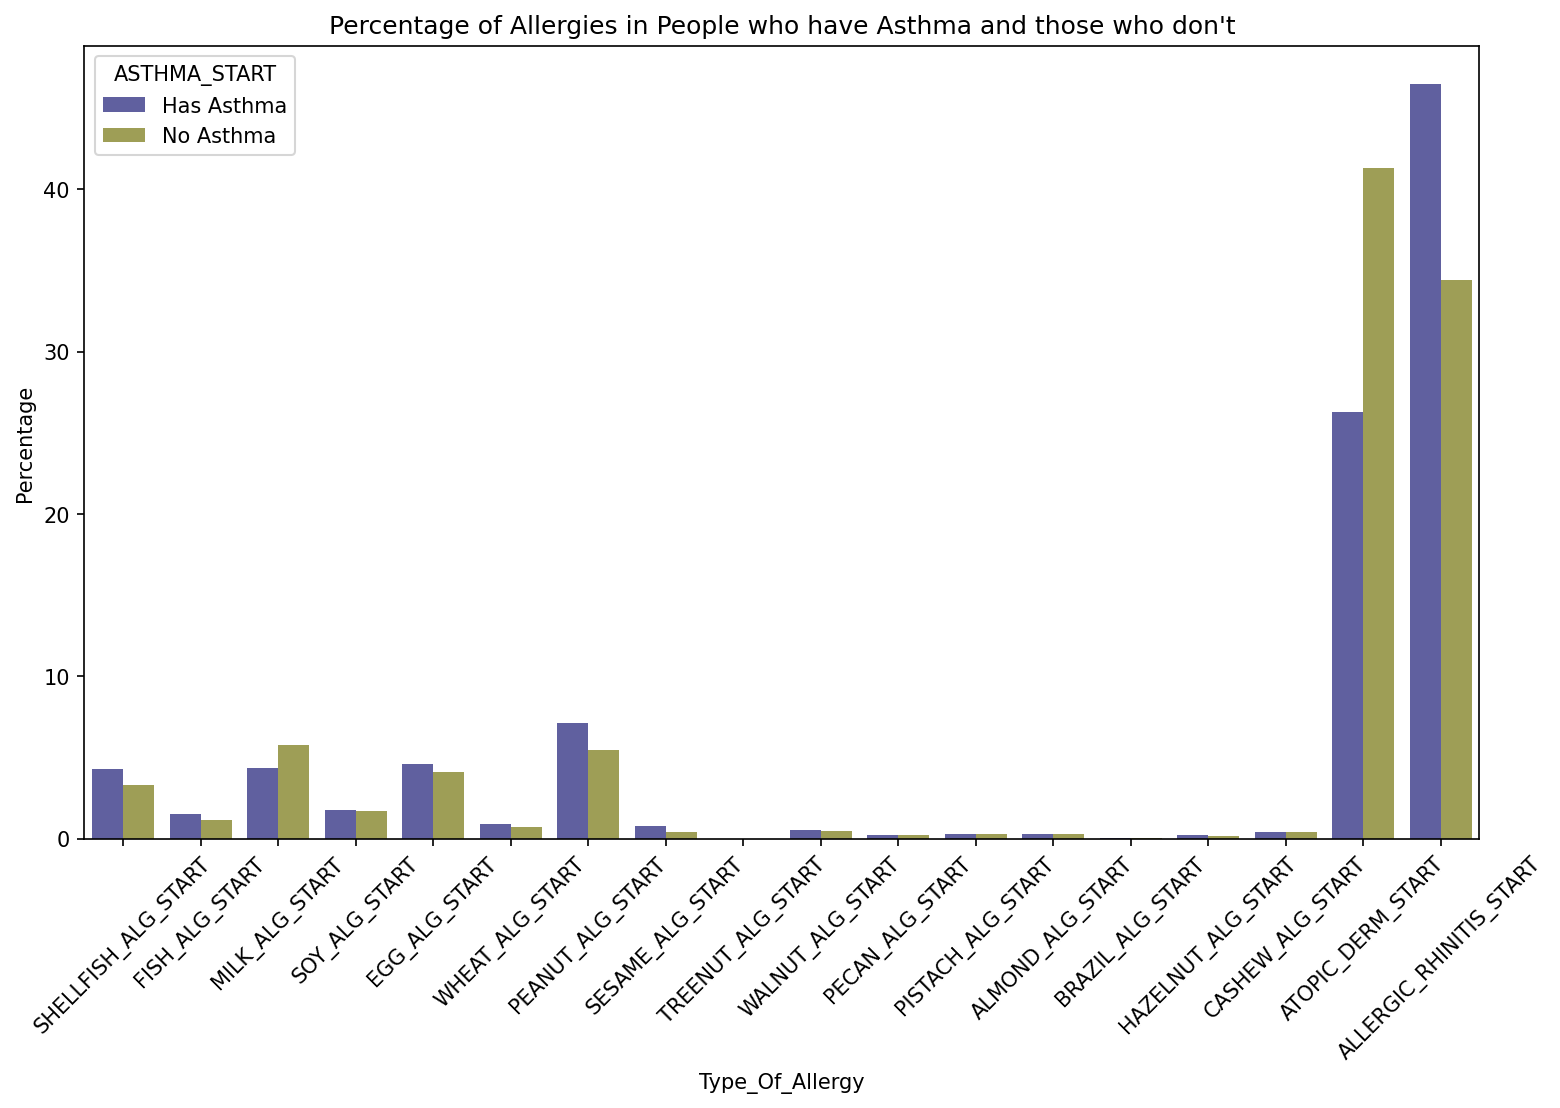

In [14]:
alls = all_asthma.groupby('ASTHMA_START').count().reset_index().melt(id_vars = 'ASTHMA_START', var_name = 'Type_Of_Allergy', value_name = 'Percentage')
alls.loc[alls['ASTHMA_START'] == 'Has Asthma', 'Percentage'] = alls[alls['ASTHMA_START'] == 'Has Asthma']['Percentage']/alls[alls['ASTHMA_START'] == 'Has Asthma']['Percentage'].sum()*100 #Sets values to percentages of the hue
alls.loc[alls['ASTHMA_START'] == 'No Asthma', 'Percentage'] = alls[alls['ASTHMA_START'] == 'No Asthma']['Percentage']/alls[alls['ASTHMA_START'] == 'No Asthma']['Percentage'].sum()*100
plt.figure(figsize=(12, 7), dpi = 150);
sns.barplot(data = alls, x = 'Type_Of_Allergy', y = 'Percentage', hue = 'ASTHMA_START', estimator=np.mean, palette='gist_stern')
plt.title("Percentage of Allergies in People who have Asthma and those who don't");
plt.xticks(rotation = 45);

So we can see that people who have asthma are around 10% more likely to have atopic dermatitis and those who don't have asthma are a bit more likely to have rhinitis. In both though there aren't really any major differences in the type of allergies an asthmatic may have vs a nonasthmatic. It's interesting to note though that both groups are significantly more likly to have atopic dermatitis and rhinitis than any other allergy.

Doing some research, rhinitis is an inflammation of the inside of the nose and affects around 1 in every 5 in the UK!

Atopic dermatitis is more of a condition that causes dry and itchy skin and is very common in young children.

In [15]:
df.head()

,BIRTH_YEAR,GENDER_FACTOR,RACE_FACTOR,ETHNICITY_FACTOR,PAYER_FACTOR,AGE_START_YEARS,AGE_END_YEARS,SHELLFISH_ALG_START,SHELLFISH_ALG_END,FISH_ALG_START,...,ATOPIC_DERM_START,ATOPIC_DERM_END,ALLERGIC_RHINITIS_START,ALLERGIC_RHINITIS_END,ASTHMA_START,ASTHMA_END,FIRST_ASTHMARX,LAST_ASTHMARX,NUM_ASTHMARX,Has_Allergies?
0,2006,S1 - Female,R1 - Black,E0 - Non-Hispanic,P1 - Medicaid,0.093087,3.164956,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
1,1994,S1 - Female,R0 - White,E0 - Non-Hispanic,P0 - Non-Medicaid,12.232717,18.880219,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.262834,18.880219,2.0,No
2,2006,S0 - Male,R0 - White,E1 - Hispanic,P0 - Non-Medicaid,0.010951,6.726899,NaN,NaN,NaN,...,4.884326,NaN,3.917864,6.157426,5.127995,NaN,1.404517,6.157426,4.0,Yes
3,2004,S0 - Male,R4 - Unknown,E1 - Hispanic,P0 - Non-Medicaid,2.398357,9.111567,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
4,2006,S1 - Female,R1 - Black,E0 - Non-Hispanic,P0 - Non-Medicaid,0.013689,6.193018,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No


Okay so now I'm actually curious to see if, given general info about birth, gender, race, etc. without including anything about allergies, can a machine learning algorithm predict whether or not someone has allergies?

First I want to see if there is any correlation between the age of someone and if they have allergies

<AxesSubplot:xlabel='AGE_START_YEARS', ylabel='AGE_END_YEARS'>

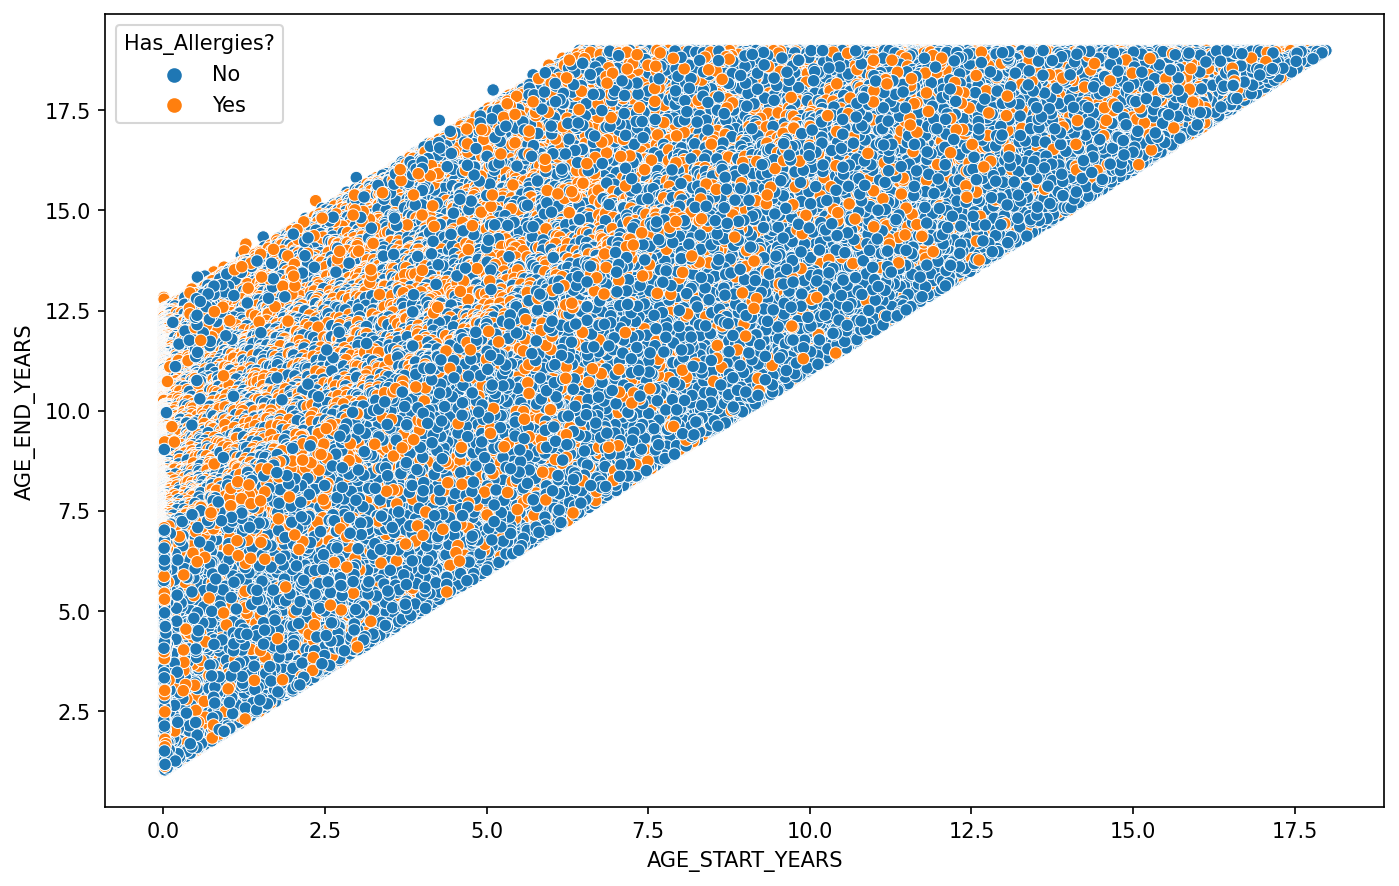

In [16]:
plt.figure(figsize = (11, 7), dpi = 150)
sns.scatterplot(data = df, x = 'AGE_START_YEARS', y = 'AGE_END_YEARS', hue = 'Has_Allergies?')

There doesn't seem to be any striking correlation here which is good.

We know that there does seem to be a correlation between people having asthma and having allergies but let's see if there is an obvious correlation or not.

<AxesSubplot:xlabel='ASTHMA_START', ylabel='count'>

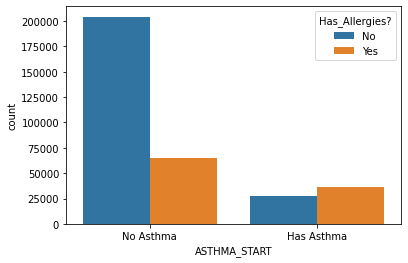

In [17]:
df = pd.concat([df.drop('ASTHMA_START', axis = 1), ast['ASTHMA_START']], axis = 1)
sns.countplot(data = df, x = 'ASTHMA_START', hue = 'Has_Allergies?')

Okay so it's fairly obvious that the Having Asthma plays a fairly big role in helping determine if someone has allergies or not. We will still keep this column though

Let's start Machine Learning! First, we'll use Logistic Regression

In [18]:
df_m = df[['BIRTH_YEAR', 'GENDER_FACTOR', 'RACE_FACTOR', 'ETHNICITY_FACTOR',
       'PAYER_FACTOR', 'AGE_START_YEARS', 'AGE_END_YEARS', 'ASTHMA_START', 'Has_Allergies?']]

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
df_m = df_m.rename(columns = {'ASTHMA_START':'Has_Asthma'})
df_m['Has_Allergies?'] = df_m['Has_Allergies?'].map({'No':'No Allergies', 'Yes':'Has Allergies'})
X = df_m.drop('Has_Allergies?', axis = 1)
y = df_m['Has_Allergies?']
X = pd.get_dummies(X, drop_first=True)
X['BIRTH_YEAR'] = X['BIRTH_YEAR'].astype('category').cat.codes
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X, y, test_size=0.25, random_state=101, stratify = y)

In [21]:
from sklearn.linear_model import LogisticRegressionCV
lg = LogisticRegressionCV(Cs = [0.1, 1, 5, 10, 50, 100], penalty = 'elasticnet', solver = 'saga', l1_ratios = [0.1, 0.3, 0.6, 0.9], max_iter = 200, refit=True)
lg.fit(X_train_l, y_train_l)

LogisticRegressionCV(Cs=[0.1, 1, 5, 10, 50, 100],
                     l1_ratios=[0.1, 0.3, 0.6, 0.9], max_iter=200,
                     penalty='elasticnet', solver='saga')

In [22]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

In [23]:
y_pred_l = lg.predict(X_test_l)
print(classification_report(y_test_l, y_pred_l))

               precision    recall  f1-score   support

Has Allergies       0.61      0.29      0.40     25451
 No Allergies       0.75      0.92      0.82     57843

     accuracy                           0.73     83294
    macro avg       0.68      0.61      0.61     83294
 weighted avg       0.71      0.73      0.69     83294



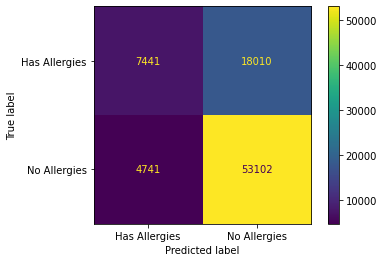

In [24]:
cm = confusion_matrix(y_test_l, y_pred_l,labels = lg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=lg.classes_)
disp.plot()

It seems that logistic regression ends with an accuracy of around 73% which is actually pretty good. The issue though is that it seems to just predict No Allergies a lot more often than Has Allergies since most of the data is Has Allergies. In fact, if you just predicted has allergies for everything, you would get an accuracy of: 

In [25]:
len(df_m[df_m['Has_Allergies?'] == 'No Allergies'])/len(df_m)*100

69.44398589329933

In [26]:
X_train_r, X_test_r, y_train_r, y_test_r  = train_test_split(X, y, test_size=0.25, random_state=101, stratify = y)

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()
param_grid = {'n_estimators':[250], 'criterion':['gini', 'entropy'], 'min_samples_split':[1,2,3,4], 'min_samples_leaf':[1,2,3], 'max_features':['sqrt', 'log2'], 'bootstrap':[True, False], 'class_weight':['balanced_subsample', None]}
gr = GridSearchCV(rf, param_grid, verbose = 1)
gr.fit(X_train_r, y_train_r)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


In [8]:
df.head()

,SUBJECT_ID,BIRTH_YEAR,GENDER_FACTOR,RACE_FACTOR,ETHNICITY_FACTOR,PAYER_FACTOR,ATOPIC_MARCH_COHORT,AGE_START_YEARS,AGE_END_YEARS,SHELLFISH_ALG_START,...,CASHEW_ALG_END,ATOPIC_DERM_START,ATOPIC_DERM_END,ALLERGIC_RHINITIS_START,ALLERGIC_RHINITIS_END,ASTHMA_START,ASTHMA_END,FIRST_ASTHMARX,LAST_ASTHMARX,NUM_ASTHMARX
0,1,2006,S1 - Female,R1 - Black,E0 - Non-Hispanic,P1 - Medicaid,False,0.093087,3.164956,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1994,S1 - Female,R0 - White,E0 - Non-Hispanic,P0 - Non-Medicaid,False,12.232717,18.880219,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.262834,18.880219,2.0
2,3,2006,S0 - Male,R0 - White,E1 - Hispanic,P0 - Non-Medicaid,True,0.010951,6.726899,NaN,...,NaN,4.884326,NaN,3.917864,6.157426,5.127995,NaN,1.404517,6.157426,4.0
3,4,2004,S0 - Male,R4 - Unknown,E1 - Hispanic,P0 - Non-Medicaid,False,2.398357,9.111567,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2006,S1 - Female,R1 - Black,E0 - Non-Hispanic,P0 - Non-Medicaid,False,0.013689,6.193018,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
c = [1,2,3,4]
df.iloc[0,0]

1